In [36]:
import pandas as pd

In [37]:
df_entrenamiento = pd.read_csv("df_entrenamiento_final (2).csv")
df_prueba = pd.read_csv("df_prueba_final (2).csv")


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Variables categóricas y numéricas
categorical_features = ['categoria_instalaciones', 'Flavor', 'sub_canal_comercial',
                        'ProductType', 'Returnability', 'Size', 'Container', 'MLSize']

# Seleccionar las columnas de entrada y salida para entrenamiento y prueba
X_train_full = df_entrenamiento[['categoria_instalaciones', 'pc_comercial_300m', 'Flavor', 'MLSize',
                                 'pc_negocios_300m', 'pc_turismo_300m', 'gasto_promedio_300m',
                                 'ingreso_promedio_300m', 'accesibilidad', 'sub_canal_comercial',
                                 'ProductType', 'Returnability', 'Size', 'Container',
                                 'success_ratio', 'success_ratio_flavor', 'success_ratio_mlsize',
                                 'success_ratio_container', 'pob_ab_300m', 'pob_cmas_300m',
                                 'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                                 'pob_e_300m']]
y_train_full = df_entrenamiento['successful']

X_test = df_prueba[['categoria_instalaciones', 'pc_comercial_300m', 'Flavor', 'MLSize',
                    'pc_negocios_300m', 'pc_turismo_300m', 'gasto_promedio_300m',
                    'ingreso_promedio_300m', 'accesibilidad', 'sub_canal_comercial',
                    'ProductType', 'Returnability', 'Size', 'Container',
                    'success_ratio', 'success_ratio_flavor', 'success_ratio_mlsize',
                    'success_ratio_container', 'pob_ab_300m', 'pob_cmas_300m',
                    'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                    'pob_e_300m']]
y_test = df_prueba['successful']

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Concatenar para garantizar consistencia en categorías
X_combined = pd.concat([X_train, X_val, X_test], axis=0)
X_encoded = pd.get_dummies(X_combined, columns=categorical_features, drop_first=True)

# Dividir nuevamente en entrenamiento, validación y prueba
X_train_encoded = X_encoded.iloc[:len(X_train), :]
X_val_encoded = X_encoded.iloc[len(X_train):len(X_train) + len(X_val), :]
X_test_encoded = X_encoded.iloc[len(X_train) + len(X_val):, :]

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=600, random_state=42, class_weight='balanced',min_samples_split=10, min_samples_leaf=4,max_features='sqrt', max_depth=50, bootstrap=True)

# Definir el modelo de Regresión Logística
#rf_model = LogisticRegression(penalty='l2',C=1.0,solver='lbfgs', max_iter=2000, class_weight='balanced',random_state=42       )

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train_encoded, y_train)

# Evaluar en el conjunto de validación
y_val_pred = rf_model.predict(X_val_encoded)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Precisión en el conjunto de validación: {val_accuracy:.2f}')
print("\nReporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_val_pred))
print("\nMatriz de confusión en el conjunto de validación:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluar en el conjunto de prueba (opcional)
y_test_pred = rf_model.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}')


Precisión en el conjunto de validación: 0.94

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5178
           1       0.82      0.98      0.89      1566

    accuracy                           0.94      6744
   macro avg       0.90      0.96      0.93      6744
weighted avg       0.95      0.94      0.95      6744


Matriz de confusión en el conjunto de validación:
[[4831  347]
 [  30 1536]]

Precisión en el conjunto de prueba: 0.95


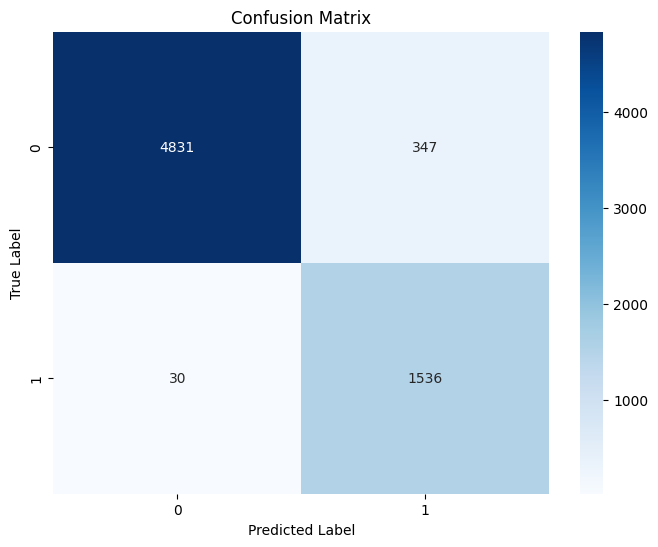

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las probabilidades predichas
y_pred_prob = rf_model.predict(X_test_encoded)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convertir probabilidades a etiquetas

# Crear la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


# Predicciones con Productos Nuevos

In [40]:
# Funciones

# Función para calcular el success_rate normalizado para todos los ProductType
def calculate_normalized_success_rate(df):
    # Calcular el success_rate por ProductType
    success_rates = df.groupby('ProductType')['successful'].mean()

    # Normalizar entre 0 y 1
    min_rate = success_rates.min()
    max_rate = success_rates.max()
    normalized_rates = (success_rates - min_rate) / (max_rate - min_rate)

    return normalized_rates

# Función para calcular el success_rate normalizado para todos los Flavor
def calculate_normalized_success_rate_flavor(df):
    # Calcular el success_rate por ProductType
    success_rates = df.groupby('Flavor')['successful'].mean()

    # Normalizar entre 0 y 1
    min_rate = success_rates.min()
    max_rate = success_rates.max()
    normalized_rates = (success_rates - min_rate) / (max_rate - min_rate)

    return normalized_rates

# Función para calcular el success_rate normalizado para todos los MLSize
def calculate_normalized_success_rate_MLSize(df):
    # Calcular el success_rate por ProductType
    success_rates = df.groupby('MLSize')['successful'].mean()

    # Normalizar entre 0 y 1
    min_rate = success_rates.min()
    max_rate = success_rates.max()
    normalized_rates = (success_rates - min_rate) / (max_rate - min_rate)

    return normalized_rates

# Función para calcular el success_rate normalizado para todos los Container
def calculate_normalized_success_rate_container(df):
    # Calcular el success_rate por ProductType
    success_rates = df.groupby('Container')['successful'].mean()

    # Normalizar entre 0 y 1
    min_rate = success_rates.min()
    max_rate = success_rates.max()
    normalized_rates = (success_rates - min_rate) / (max_rate - min_rate)

    return normalized_rates


In [41]:
df_combinado = pd.concat([df_entrenamiento, df_prueba], ignore_index = True)
df = df_combinado.copy()

# Calcular los success_ratio normalizados
normalized_success_rates = calculate_normalized_success_rate(df)
normalized_success_rates_flavor = calculate_normalized_success_rate_flavor(df)
normalized_success_rates_MLSize = calculate_normalized_success_rate_MLSize(df)
normalized_success_rates_container = calculate_normalized_success_rate_container(df)
# Extraer los valores únicos directamente del DataFrame
valid_values = {
    'ProductType': df['ProductType'].unique(),
    'Flavor': df['Flavor'].unique(),
    'Container': df['Container'].unique(),
    'Returnability': df['Returnability'].unique(),
    'Size': df['Size'].unique()
}

# Función para validar entradas
def validate_input(input_value, valid_set, feature_name):
    if input_value not in valid_set:
        raise ValueError(f"Error: {feature_name} '{input_value}' no es válido. Opciones válidas: {list(valid_set)}")
    return input_value

# Solicitar las características del nuevo producto con validación
product_type_input = validate_input(input("ProductType: "), valid_values['ProductType'], 'ProductType')
flavor_input = validate_input(input("Flavor: "), valid_values['Flavor'], 'Flavor')
mlsize_input = float(input("MLSize: "))  # Suponer que MLSize no necesita validación
container_input = validate_input(input("Container: "), valid_values['Container'], 'Container')
returnability_input = validate_input(input("Returnability ('Returnable' o 'Non-Returnable'): "), valid_values['Returnability'], 'Returnability')
size_input = validate_input(input("Size (e.g., 'FAMILIAR', 'INDIVIDUAL'): "), valid_values['Size'], 'Size')

# Obtener el success_ratio normalizado para el ProductType ingresado
success_ratio_calculated = normalized_success_rates.get(product_type_input, 0)
success_ratio_calculated_flavor = normalized_success_rates_flavor.get(flavor_input, 0)
success_ratio_calculated_mlsize = normalized_success_rates_MLSize.get(mlsize_input, 0)
success_ratio_calculated_container = normalized_success_rates_container.get(container_input, 0)

# Definir las características del nuevo producto
nuevo_producto = {
    'ProductType': product_type_input,
    'Returnability': returnability_input,
    'Size': size_input,
    'Container': container_input,
    'Flavor': flavor_input,
    'MLSize': mlsize_input,
    'success_ratio': success_ratio_calculated,
    'success_ratio_flavor': success_ratio_calculated_flavor,
    'success_ratio_mlsize': success_ratio_calculated_mlsize,
    'success_ratio_container': success_ratio_calculated_container
}

# Resto del código se mantiene igual
clientes = df[['CustomerId', 'categoria_instalaciones', 'pc_comercial_300m', 'pc_negocios_300m',
               'pc_turismo_300m', 'gasto_promedio_300m', 'ingreso_promedio_300m', 'accesibilidad',
               'sub_canal_comercial','pob_ab_300m', 'pob_cmas_300m',
                            'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                            'pob_e_300m']].drop_duplicates('CustomerId').reset_index(drop=True)

# Añadir las características del nuevo producto a cada cliente
for feature in ['ProductType', 'Returnability', 'Size', 'Container', 'Flavor', 'MLSize', 'success_ratio','success_ratio_flavor','success_ratio_mlsize',	'success_ratio_container']:
    clientes[feature] = nuevo_producto[feature]

X_nuevo = clientes.drop('CustomerId', axis=1)

# Transformar variables categóricas en dummies
X_nuevo_encoded = pd.get_dummies(X_nuevo, columns=categorical_features, drop_first=True)

# Asegurarse de que las columnas coincidan con las del modelo entrenado
X_nuevo_encoded = X_nuevo_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Realizar predicciones
probabilidades = rf_model.predict_proba(X_nuevo_encoded)[:, 1]

# Añadir las probabilidades al dataframe de clientes
clientes['probabilidad_exito'] = probabilidades

# Generar la lista de clientes ordenados
clientes_ordenados = clientes[['CustomerId', 'probabilidad_exito']].sort_values(by='probabilidad_exito', ascending=False)

# Mostrar los top N clientes
top_N = 10
print(f"\nTop {top_N} clientes más propensos al éxito del nuevo producto:")
print(clientes_ordenados.head(top_N))


ProductType: BEBIDAS ENERGETICAS
Flavor: NARANJA
MLSize: 710
Container: VIDRIO
Returnability ('Returnable' o 'Non-Returnable'): RETORNABLE
Size (e.g., 'FAMILIAR', 'INDIVIDUAL'): INDIVIDUAL

Top 10 clientes más propensos al éxito del nuevo producto:
      CustomerId  probabilidad_exito
1345   510407644            0.727581
1445   510537084            0.725183
1819   510403706            0.725130
283    500073052            0.725041
1429   510524028            0.724784
1962   510801180            0.724392
656    500277813            0.723836
1834   510525855            0.723834
1844   510575263            0.722964
747    500310652            0.722859
